In [1]:
import os
import csv

# Graphics
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Data Proccessing
import pandas as pd
import numpy as np
import tensorflow as tf

## Visualization and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import seaborn as sns


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
import joblib

# Other
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
global CONST_DIC_PATH
CONST_DIC_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset/"
CONST_FILE_NAMES = [
    'part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
]

In [4]:
CONST_FILE_PATHS = [ CONST_DIC_PATH + FILE_NAME for FILE_NAME in CONST_FILE_NAMES]
print(CONST_FILE_PATHS)

['/content/drive/MyDrive/Colab Notebooks/dataset/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']


In [5]:
global CONST_FIELDS
global CONST_ORDINARY_LABEL_NAME
global CONST_DDOS_LABEL
global CONST_DOS_LABEL
global CONST_MIRAI_LABEL
global CONST_SPOOFING_LABEL
global CONST_RECON_LABEL
global CONST_WEB_LABEL
global CONST_BRUTE_FORCE_LABEL
global CONST_DROP_FIELD
global CONST_NAME_MODEL
global CONST_TWO_CLASSES_WITH_LSTM
global CONST_TWO_CLASSES_WITH_RFC
global CONST_EIGHT_CLASSES_WITH_LSTM

CONST_NAME_MODEL = 'model.h5'

CONST_FIELDS = [
    'flow_duration',
    'Header_Length',
    'Protocol_Type',
    'Duration',
    'Rate',
    'Srate',
    'Drate',
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ack_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'ack_count',
    'syn_count',
    'fin_count',
    'urg_count',
    'rst_count',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
    'tot_sum',
    'Min',
    'Max',
    'AVG',
    'Std',
    'Tot_size',
    'IAT',
    'Number',
    'Magnitue',
    'Radius',
    'Covariance',
    'Variance',
    'Weight',
    'label']

## Nhãn bình thường
CONST_ORDINARY_LABEL_NAME = 'BenignTraffic'

## Gồm có 7 nhãn tấn công

CONST_DDOS_LABEL = [
    'DDoS-ICMP_Flood',
    'DDoS-UDP_Flood',
    'DDoS-TCP_Flood',
    'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood',
    'DDoS-RSTFINFlood',
    'DDoS-SynonymousIP_Flood',
    'DDoS-ICMP_Fragmentation',
    'DDoS-ACK_Fragmentation',
    'DDoS-UDP_Fragmentation',
    'DDoS-HTTP_Flood',
    'DDoS-SlowLoris']

CONST_DOS_LABEL = [
    'DoS-UDP_Flood',
    'DoS-TCP_Flood',
    'DoS-SYN_Flood',
    'DoS-HTTP_Flood']

CONST_MIRAI_LABEL = [
    'Mirai-greeth_flood',
    'Mirai-udpplain',
    'Mirai-greip_flood']

CONST_SPOOFING_LABEL = [
    'MITM-ArpSpoofing',
    'DNS_Spoofing']

CONST_RECON_LABEL = [
    'Recon-HostDiscovery',
    'Recon-OSScan',
    'Recon-PortScan',
    'Recon-PingSweep',
    'VulnerabilityScan']

CONST_WEB_LABEL = [
    'SqlInjection',
    'BrowserHijacking',
    'CommandInjection',
    'Backdoor_Malware',
    'XSS',
    'Uploading_Attack']

CONST_BRUTE_FORCE_LABEL = [
    'DictionaryBruteForce']

CONST_PROTOCOL_FIELDS = [
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC'
]

CONST_DROP_FIELD = [
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
    'Min',
    'label'
    ]

CONST_CATEGORICAL_FIELDS = [
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ack_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
]

CONST_TWO_CLASSES_WITH_LSTM = "two_classes_lstm.h5"
CONST_TWO_CLASSES_WITH_RFC = 'two_classes_rfc.pickle'
CONST_EIGHT_CLASSES_WITH_LSTM = 'eight_classes_lstm.h5'

In [37]:
def show_wheel_chart(data, group_labels = [], label_text = []):
    data = data.copy()
    label_values = []

    for group_label in group_labels:
      label_value = len(data[data['label'].isin(group_label)])
      label_values.append(label_value)

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')

    ax.pie(label_values, labels = label_text, autopct = '%1.2f%%')
    plt.show()

### Sử dụng để gộp dữ liệu

In [6]:
def merge_data_from_multiple_file(file_paths = [], col_names = []):
    data = pd.DataFrame()

    if len(file_paths) == 0:
        raise ValueError('Vui lòng thêm đường dẫn')

    for file_path in file_paths:
        sub_data = pd.read_csv(file_path, names = col_names)

        if len(sub_data) == 0:
            raise ValueError('Dữ liệu trong file ${}'.format(file_path))

        if len(data) == 0:
            data = pd.concat([data, sub_data])
            continue

        if len(data.columns) != len(data.columns):
            raise  ValueError('số lượng cột không khớp ! Vui lòng kiểm tra lại số lượng cột')

        data = pd.concat([data, sub_data])

    return data

data = merge_data_from_multiple_file(file_paths=CONST_FILE_PATHS, col_names= CONST_FIELDS)

for cate_field in CONST_CATEGORICAL_FIELDS:
    data[cate_field] = data[cate_field].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893013 entries, 0 to 227909
Data columns (total 47 columns):
 #   Column           Dtype   
---  ------           -----   
 0   flow_duration    float64 
 1   Header_Length    float64 
 2   Protocol_Type    float64 
 3   Duration         float64 
 4   Rate             float64 
 5   Srate            float64 
 6   Drate            float64 
 7   fin_flag_number  category
 8   syn_flag_number  category
 9   rst_flag_number  category
 10  psh_flag_number  category
 11  ack_flag_number  category
 12  ece_flag_number  category
 13  cwr_flag_number  category
 14  ack_count        float64 
 15  syn_count        float64 
 16  fin_count        float64 
 17  urg_count        float64 
 18  rst_count        float64 
 19  HTTP             category
 20  HTTPS            category
 21  DNS              category
 22  Telnet           category
 23  SMTP             category
 24  SSH              category
 25  IRC              category
 26  TCP            

### Phân chia thành 2 tập dữ liệu và kiểm tra sự phân bố của dữ liệu

> Văn bản được thụt lề


- Tập dữ liệu tấn công
- Tập dữ liệu bình thường

###  Tập dữ liệu mất cân bằng


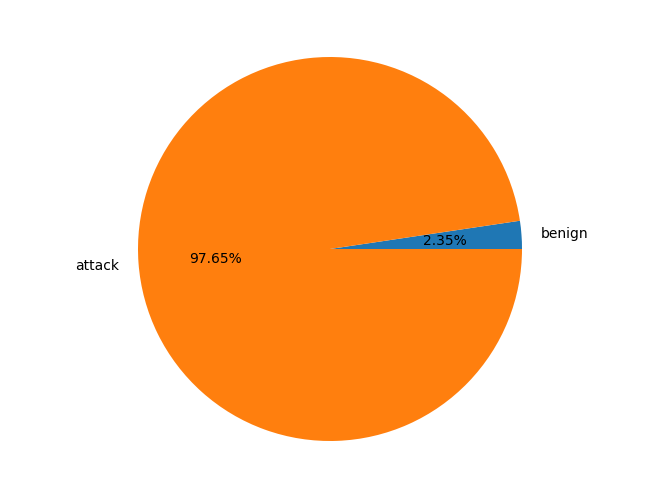

In [7]:
def split_two_classes(data):
    new_data = data.copy()

    condition_benign_label = new_data['label'] == CONST_ORDINARY_LABEL_NAME
    condition_attack_label = new_data['label'] != CONST_ORDINARY_LABEL_NAME

    benign_label_data = new_data[condition_benign_label]
    attack_label_data = new_data[condition_attack_label]

    return [benign_label_data, attack_label_data]

def show_pie_two_classes(data):
    data = data.copy()

    labels = ['benign', 'attack']
    [n_sam_benign, n_sam_attack] = split_two_classes(data)

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')

    ax.pie([len(n_sam_benign), len(n_sam_attack)], labels = labels, autopct = '%1.2f%%')
    plt.show()
show_pie_two_classes(data)


### Phân chia tập dữ liệu thành 8 lớp và kiểm tra sự phân bố của dữ liệu

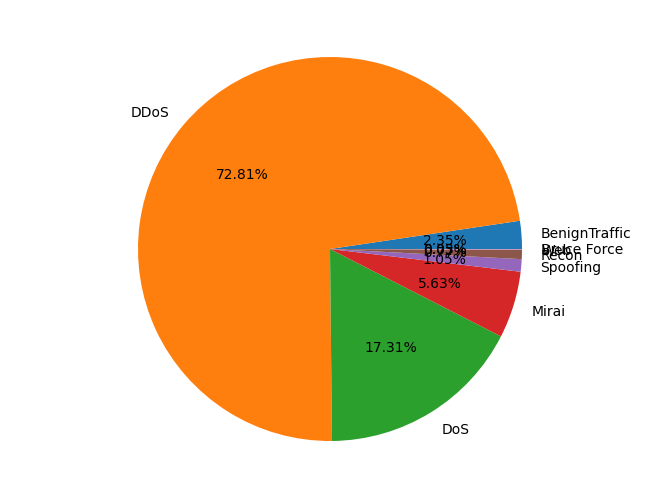

In [8]:
def split_eight_classes(data):
    data = data.copy()

    label_lens = []

    labels = [
        [CONST_ORDINARY_LABEL_NAME],
        CONST_DDOS_LABEL,
        CONST_DOS_LABEL,
        CONST_MIRAI_LABEL,
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ]


    label_text = [
        'BenignTraffic',
        'DDoS',
        'DoS',
        'Mirai',
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ]

    for label in labels:
        n_sam_label = data[data['label'].isin(label)]
        label_lens.append(len(n_sam_label))

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')

    ax.pie(label_lens, labels = label_text, autopct = '%1.2f%%')
    plt.show()
split_eight_classes(data)

### Kiểm tra sự phân bố của các field đối với từng nhãn trong tập dữ liệu

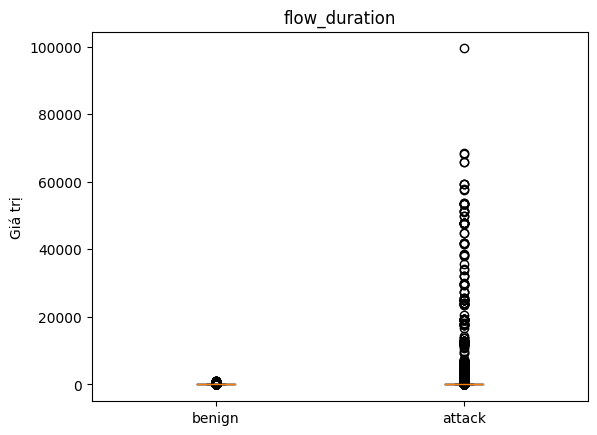

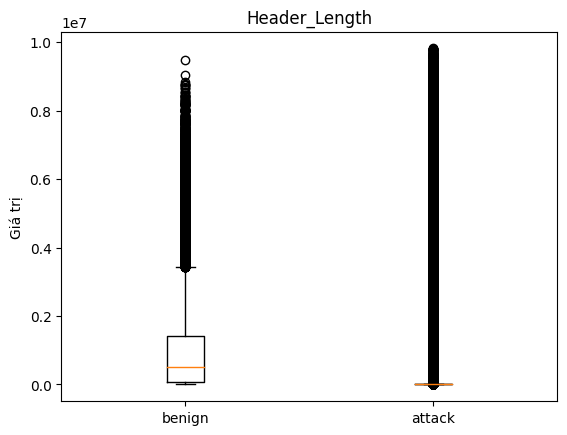

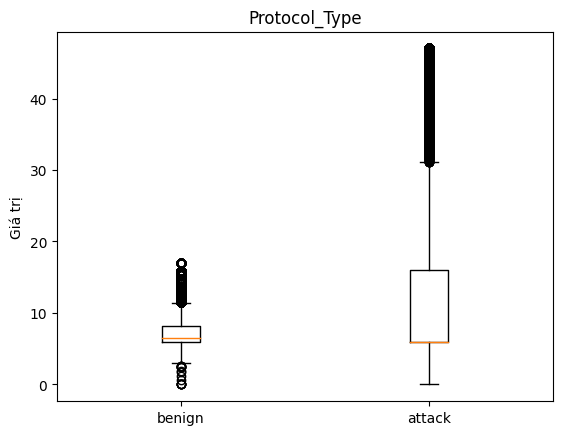

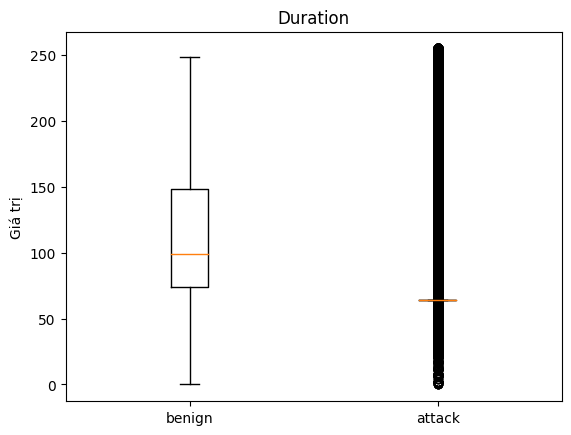

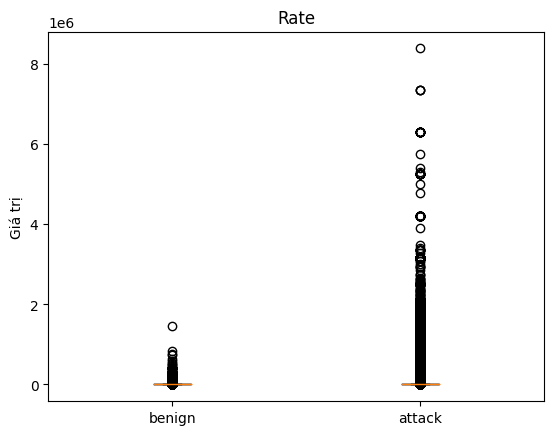

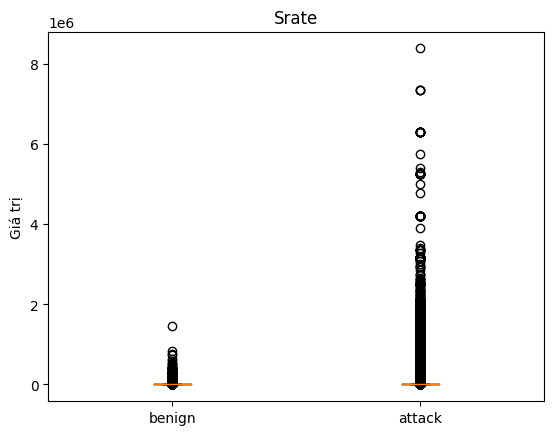

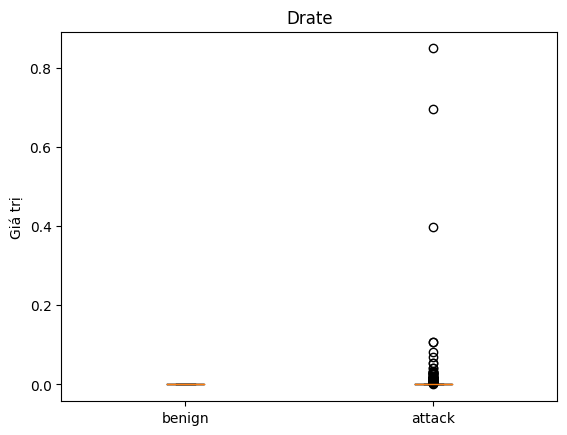

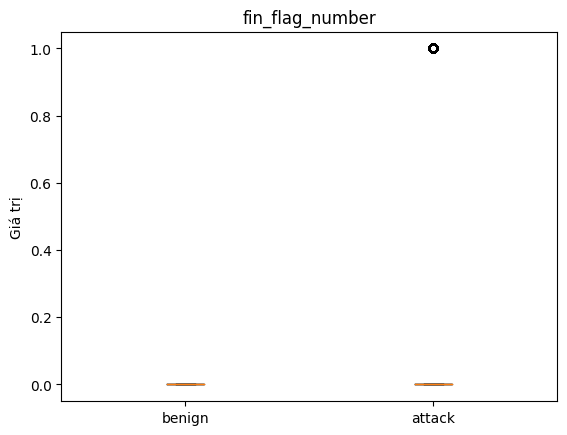

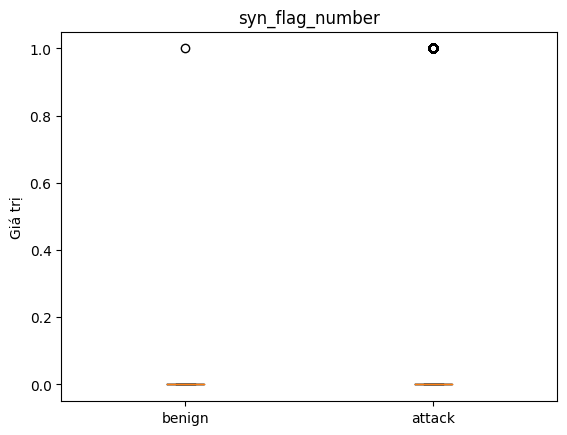

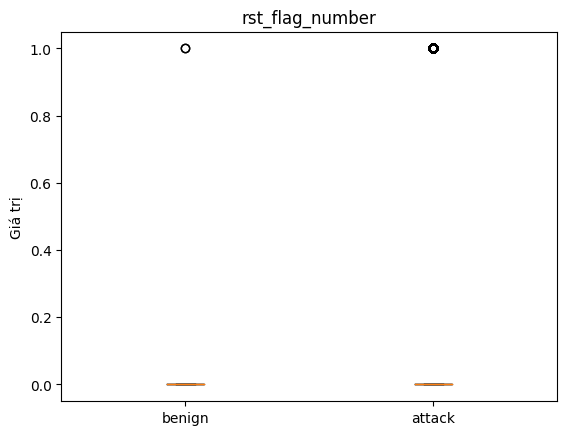

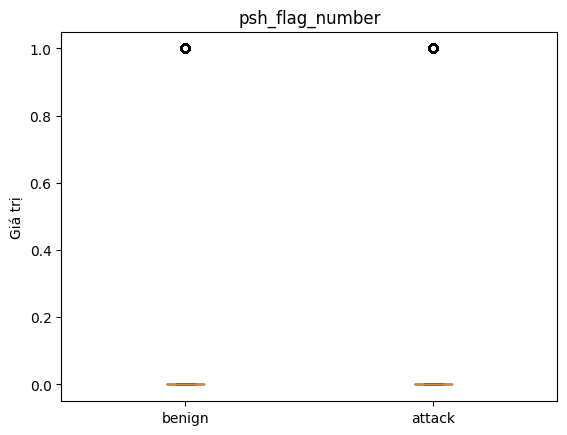

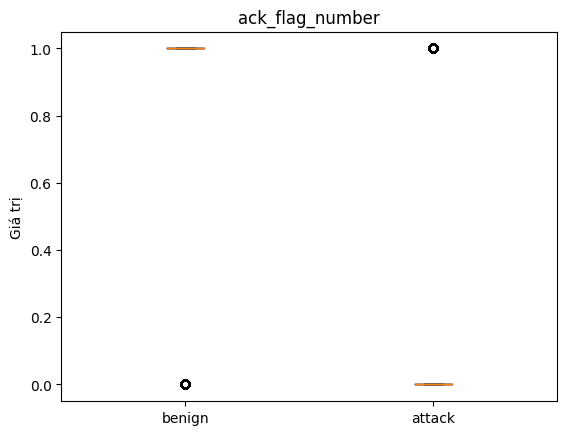

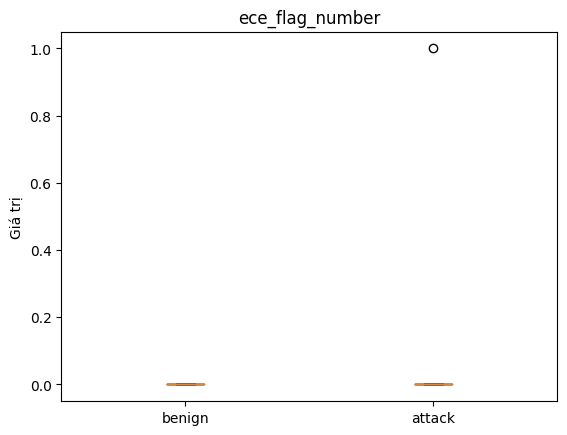

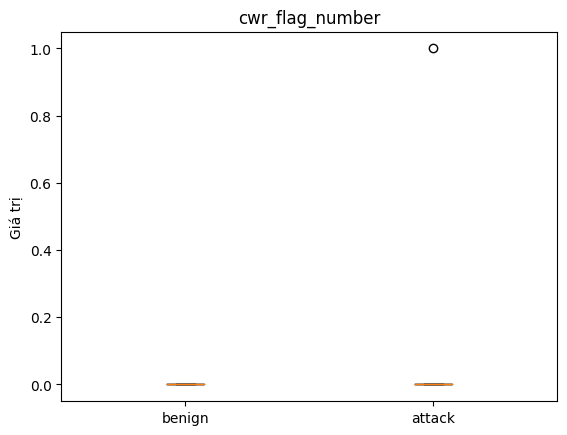

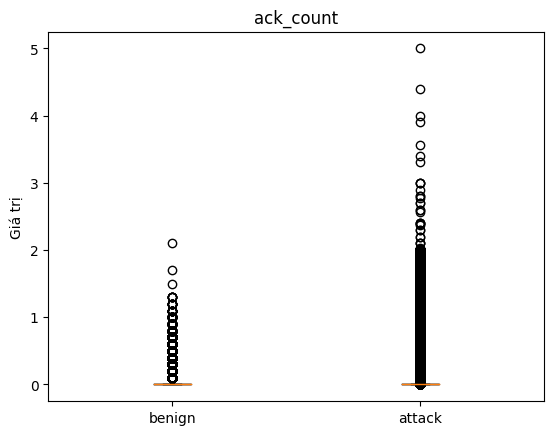

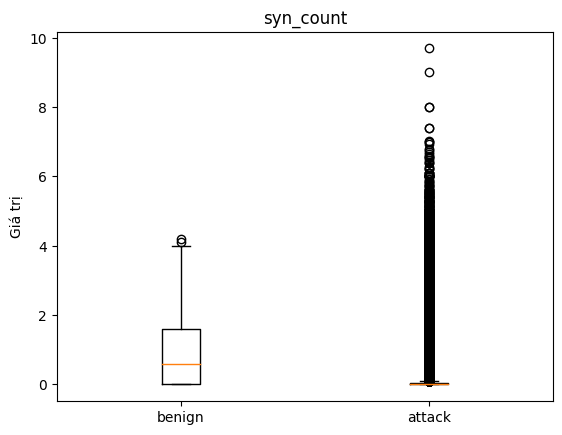

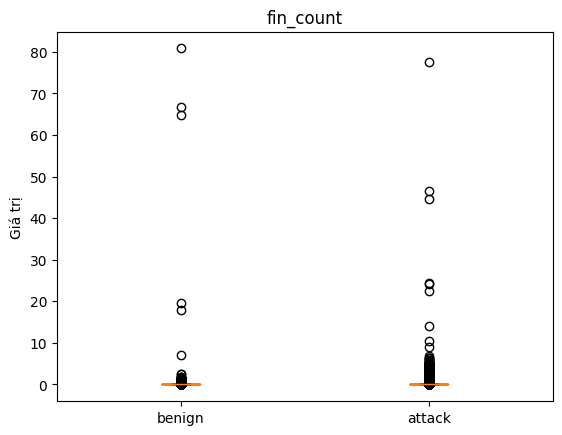

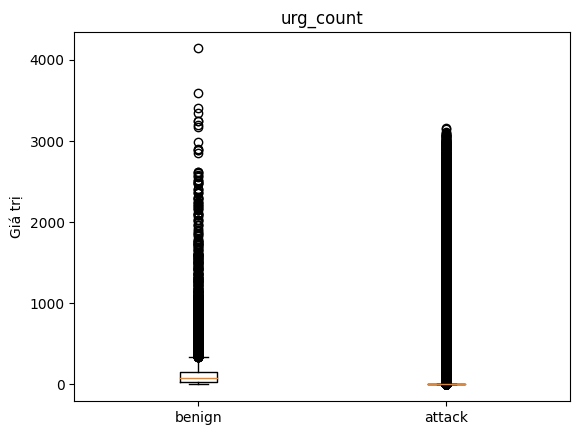

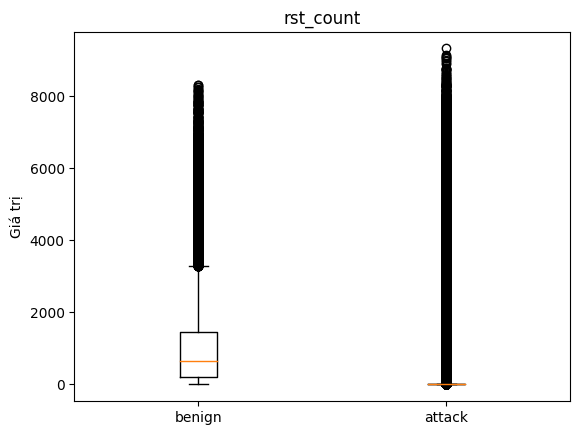

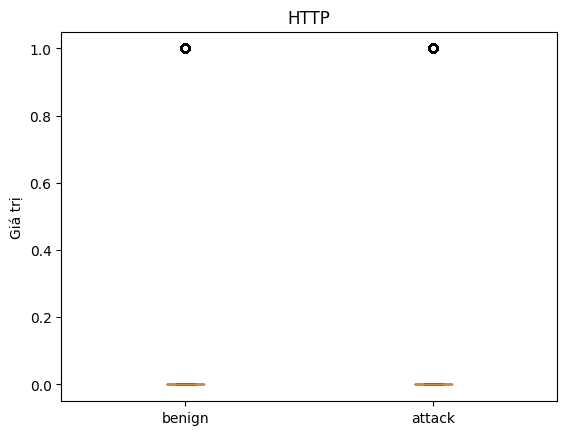

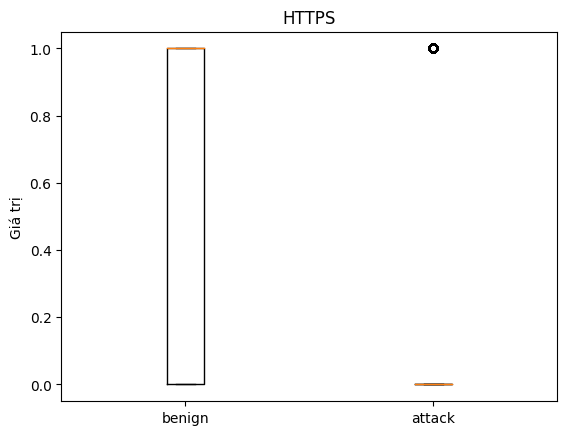

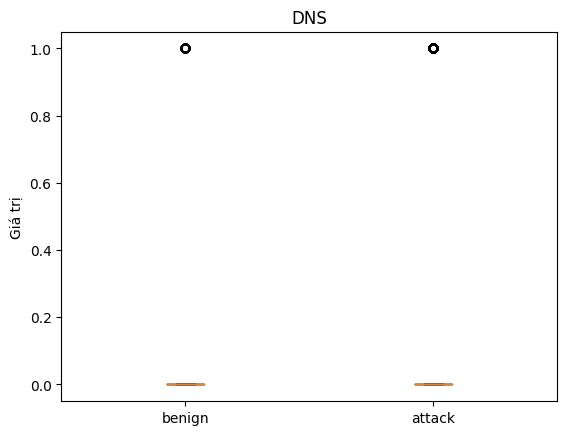

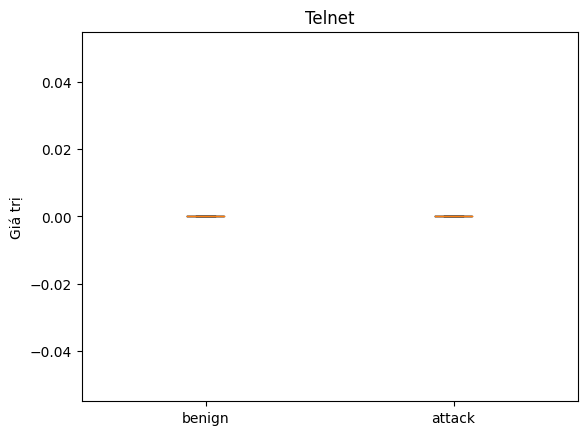

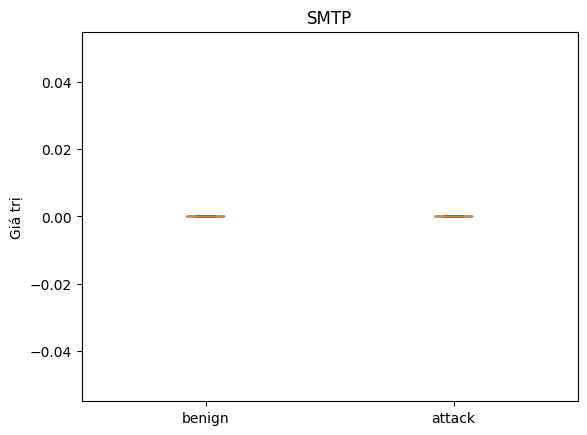

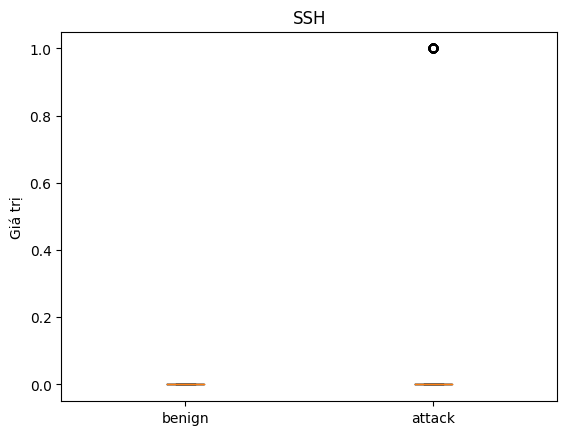

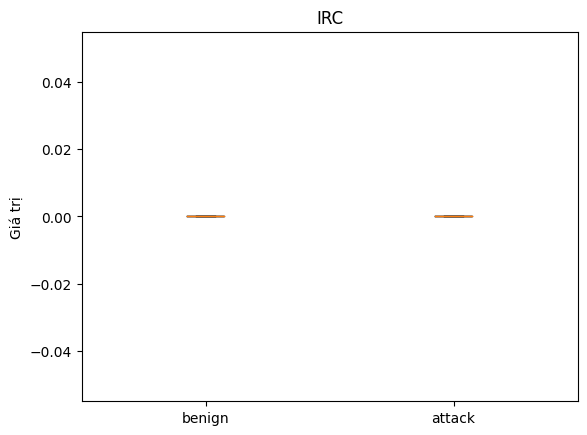

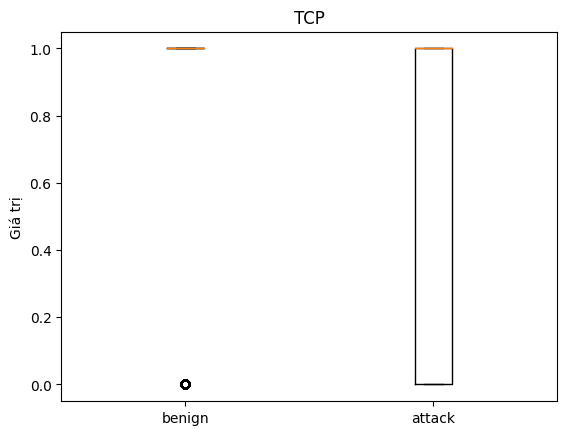

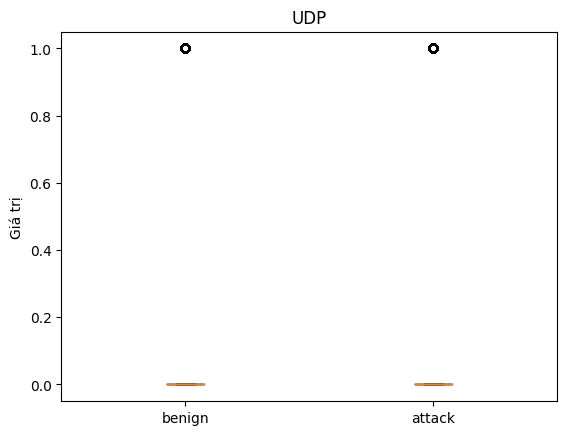

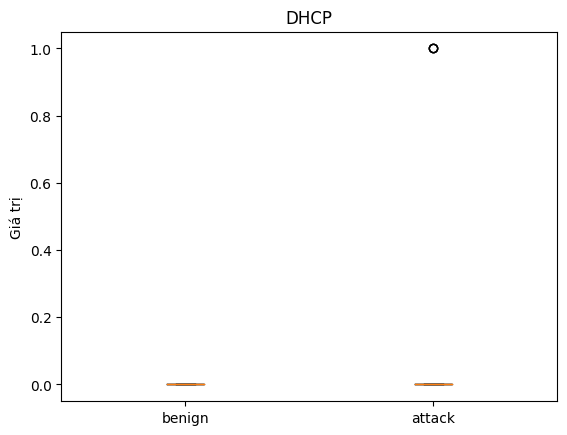

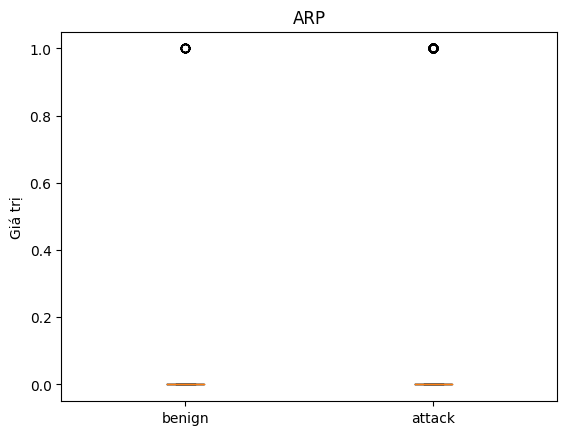

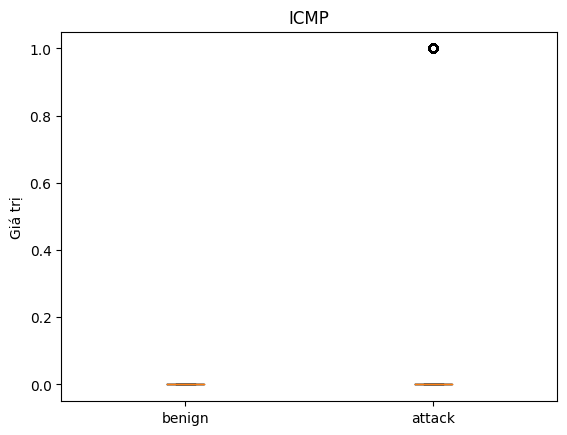

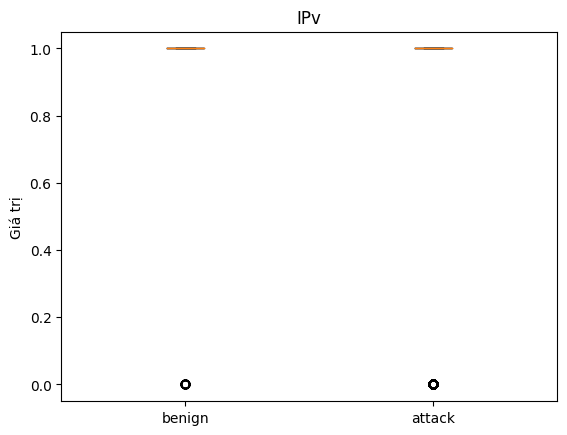

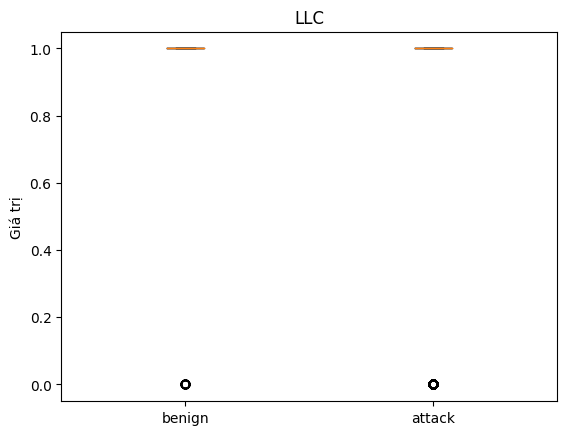

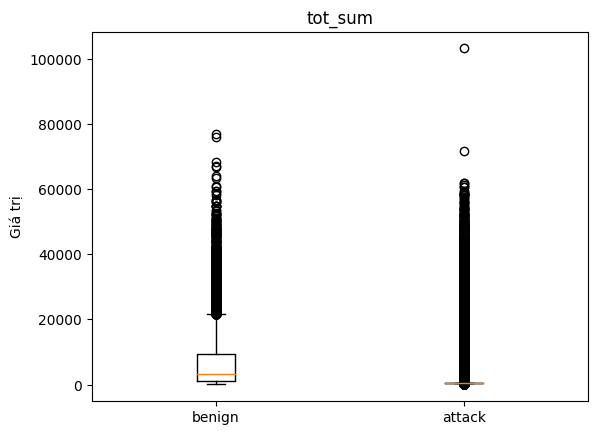

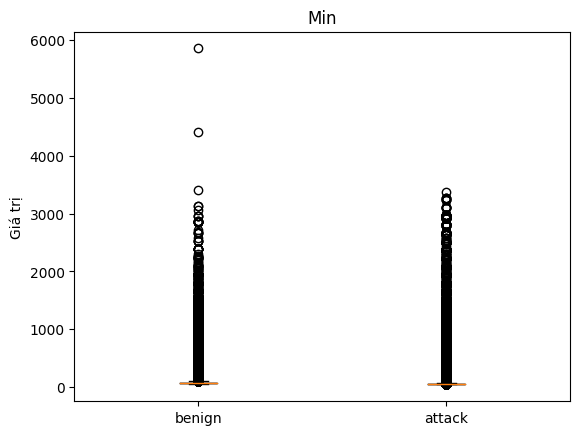

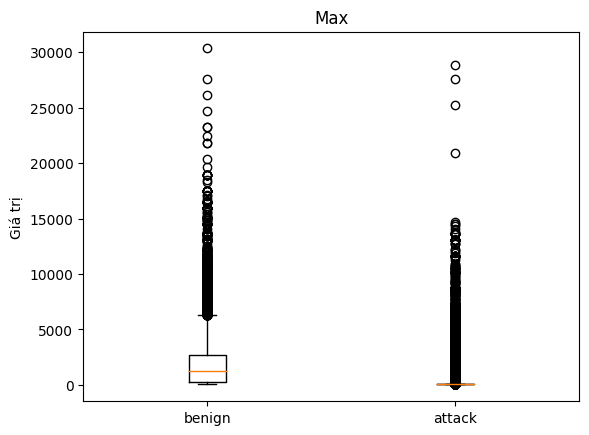

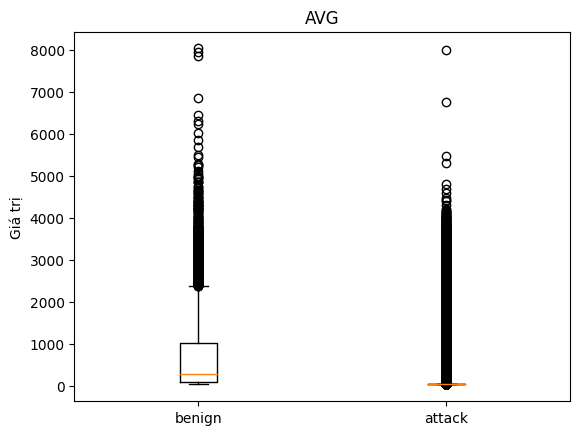

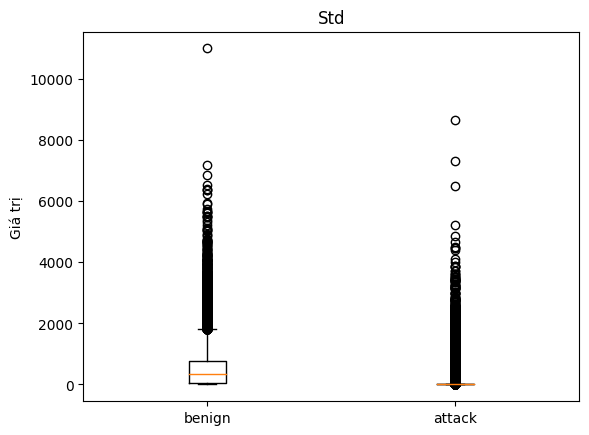

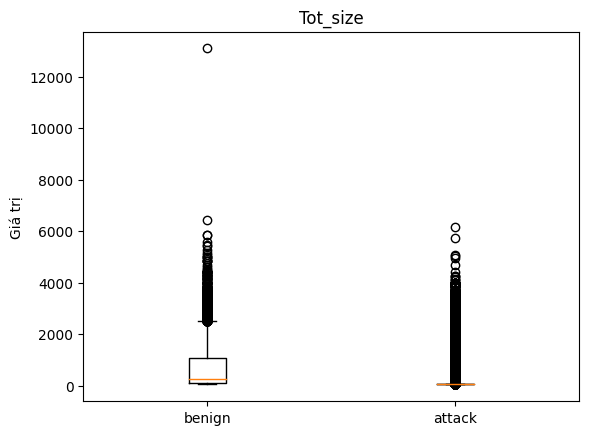

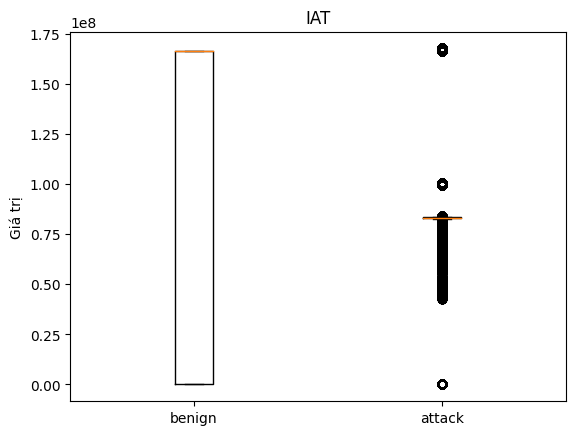

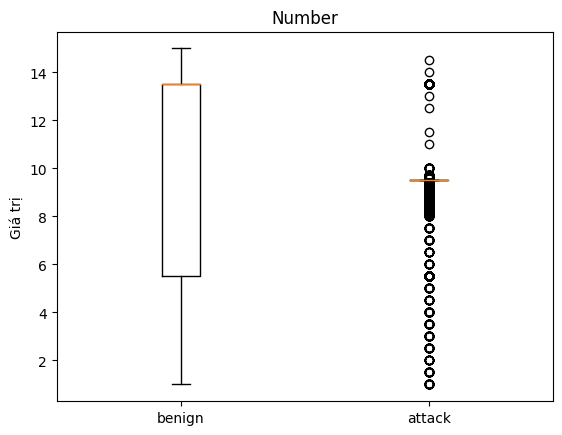

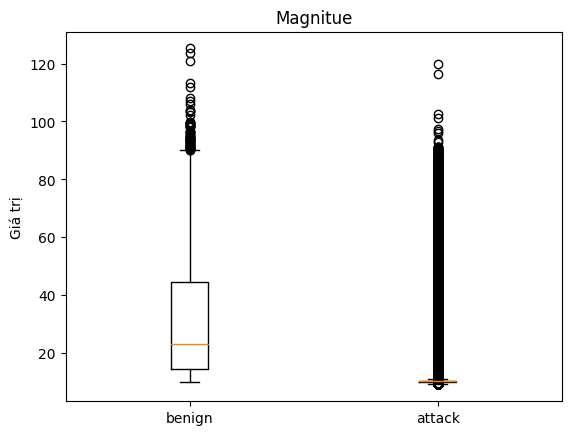

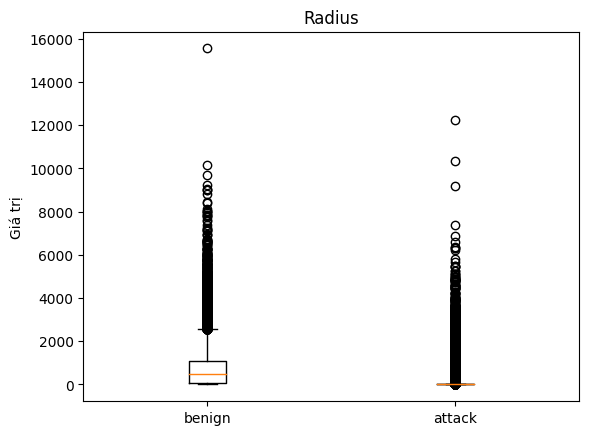

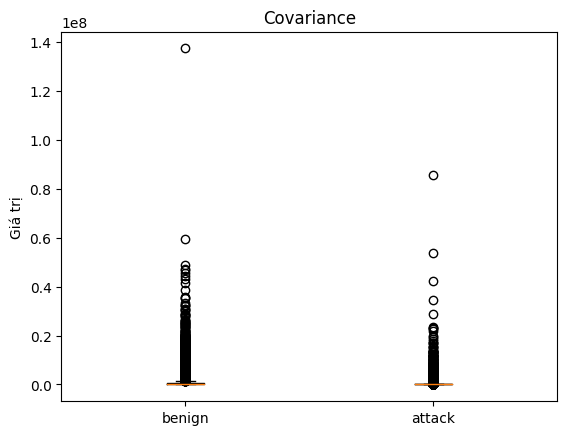

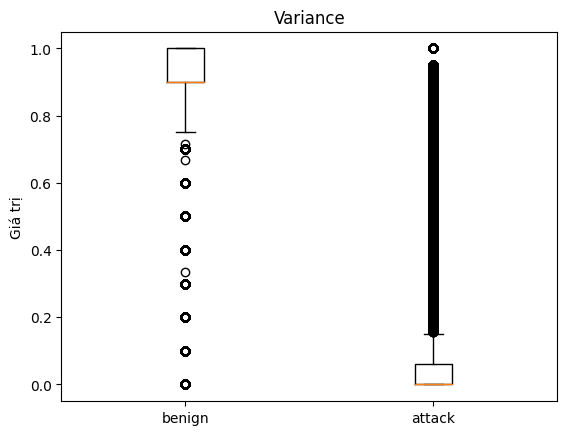

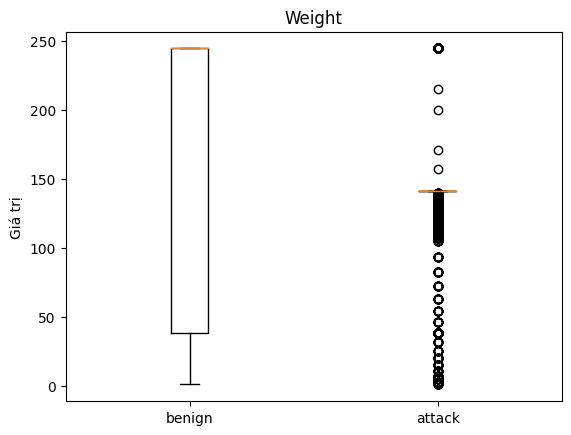

In [9]:
def show_plot_of_attack_and_benign(data = [], title = '', x_labels = []):

    plt.boxplot([item.values for item in data], labels=x_labels)
    # plt.hist([item.values for item in data])
    plt.title(title)
    plt.ylabel('Giá trị')

    plt.show()


def analyze_each_field_of_data(data = [], col_names = []):
    new_data = data.copy()
    x_labels = ['benign', 'attack']
    for col_name in col_names:
        sub_data = [sub_new_data[col_name] for sub_new_data in new_data]
        show_plot_of_attack_and_benign(sub_data, title=col_name, x_labels=x_labels)

analyze_each_field_of_data(split_two_classes(data), col_names= [
    'flow_duration',
    'Header_Length',
    'Protocol_Type',
    'Duration',
    'Rate',
    'Srate',
    'Drate',
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ack_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'ack_count',
    'syn_count',
    'fin_count',
    'urg_count',
    'rst_count',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
    'tot_sum',
    'Min',
    'Max',
    'AVG',
    'Std',
    'Tot_size',
    'IAT',
    'Number',
    'Magnitue',
    'Radius',
    'Covariance',
    'Variance',
    'Weight',
])



### Kiểm tra sự phân bố dữ liệu trong các field của  dataset CIC IOT 2023

In [10]:

# def show_plot(data, title):
#     plt.boxplot(data)
#     plt.title(title)
#     plt.ylabel('Giá trị')

#     plt.show()

# def analyze_each_field_of_dataset(data, col_names):
#     new_data = data.copy()
#     for col_name in col_names:
#         arr_col_name = new_data[col_name].values
#         show_plot(arr_col_name, col_name)

# analyze_each_field_of_dataset(data = data, col_names=col_names)

# show_plot(data = data['flow_duration'].value, title = 'tham so Flow duration')


In [11]:
def delete_field_of_data(data, fields = []):
    data = data.copy()
    new_data = data.drop(fields, axis = 1)
    return new_data

## Tách tập dữ liệu thành 2 phần gồm có dữ liệu bình thường và dữ liệu tấn công

In [12]:
def split_label_two_classes(data):
    new_data = data.copy()

    def group_two_label(label):
        if label == CONST_ORDINARY_LABEL_NAME:
            return 0
        return 1

    new_data['two_label'] = new_data['label'].apply(group_two_label)
    return new_data

In [13]:
### Training model LSTM
def LSTM_model(X_train, X_test, Y_train, Y_test):

    model = Sequential()
    model.add(LSTM(units = 32,return_sequences= True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(LSTM(units = 32))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units = 64, return_sequences= True, input_shape = (X_train.shape[1], X_train.shape[2])))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units = 32, return_sequences= True, input_shape = (X_train.shape[1], X_train.shape[2])))
    # model.add(Dropout(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = "adam", metrics = ['accuracy'], loss = 'binary_crossentropy', )
    check_point_the_best_model = ModelCheckpoint(
                             filepath=CONST_NAME_MODEL,
                             monitor='accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

    callbacks = [check_point_the_best_model]
    model.fit(X_train, Y_train, epochs = 10, batch_size = 128, validation_data = (X_test, Y_test),  callbacks=callbacks)
    model.summary()
    # model.save(CONST_NAME_MODEL)

# lstm_model = LSTM_model(new_data)

In [14]:
def RandomForestClassifier_model(X_train, X_test, Y_train, Y_test):
    rfc_model = RandomForestClassifier(n_estimators=200)
    rfc_model.fit(X_train, Y_train)

    Y_pred = rfc_model.predict(X_test)
    # Y_pred = np.round(Y_pred).flatten()
    print(Y_pred)

    joblib.dump(rfc_model, "random_forest.joblib")

    return rfc_model

In [15]:
file_paths_test = [
     '../data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     # '../data/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     # '../data/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
]

# data_test = merge_data_from_multiple_file(file_paths=file_paths_test, col_names=col_names)

### Từ những dữ liệu trên có thể thấy được những field ở cả hai nhãn có điểm chung
- fin_fag_number
- syn_flag_number
- rst_flag_number
- psh_flag_number
- ece_flag_number
- cwr_flag_number
- http
- https
- DNS
- Telnet
- SMTP
- SSH
- IRC
- UDP
- DHCP
- ARP
- ICMP
- IPv
- LLC

### Xây dựng tập dư liệu theo tỉ lệ sau:
### Đây là tỉ lệ giữa lớp tấn công và lớp bình thường
- 80: 20
- 70: 30
- 60: 40

In [16]:
def make_unsam_ratio(data, ratio = 80 // 20 ):
    [benign, attack] = split_two_classes(data)
    len_benign = len(benign)

    attack = attack.iloc[0: (len_benign * ratio), : ]

    return pd.concat([benign, attack])

In [17]:
def merge_data(benign, attack):
  return pd.concat([benign, attack])

In [18]:
def group_data(data, batch_size=10):
    X = []
    Y = []
    [n_sam_benign, n_sam_attack] = make_unsam_ratio(data)
    for i in range(batch_size, len(n_sam_benign) // 10):
      X.append(n_sam_benign.iloc[i - batch_size : i, :])
      Y.append(0)

    for i in range(batch_size, len(n_sam_attack) // 10):
      X.append(n_sam_attack.iloc[i - batch_size : i, :])
      Y.append(1)


In [19]:
def split_X_and_Y(data):
    data = data.copy()
    X_data, Y_data = data.iloc[:, 0: -1], data.iloc[:, -1]
    return [X_data, Y_data]

In [20]:
def make_dimen_of_data(data):
    new_data = data.copy()

    X_data, Y_data = new_data.iloc[:, 0: -1], data.iloc[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)

    X_train = X_train.values
    X_test = X_test.values

    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    return [X_train, X_test, Y_train, Y_test]


In [21]:
def log_confusion_maxtrix(model, X_test, Y_test, title):
    Y_pred = model.predict(X_test)
    Y_pred = np.round(Y_pred).flatten()

    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.title("Confusion maxtrix LSTM model")
    plt.xlabel("Dữ liệu dự đoán")
    plt.ylabel("Dữ liệu thực tế")
    plt.show()

### Xây dựng log confusion maxtrix

### Kiểm tra độ chính xác của thuật toán


In [22]:
def training_process(file_paths = [], col_names = []):
    ## Chuẩn bị dữ liệu
    data = merge_data_from_multiple_file(file_paths=CONST_FILE_PATHS, col_names= CONST_FIELDS)

    data = make_unsam_ratio(data, 50 // 50)
    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)
    [X_train, X_test, Y_train, Y_test] = make_dimen_of_data(data)

    LSTM_model(X_train, X_test, Y_train, Y_test)

training_process(file_paths = CONST_FILE_PATHS, col_names = CONST_FIELDS)


Epoch 1/10
551/557 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.7426
Epoch 1: accuracy improved from -inf to 0.74249, saving model to model.h5
557/557 [==============================] - 9s 8ms/step - loss: 0.5235 - accuracy: 0.7425 - val_loss: 0.4931 - val_accuracy: 0.7452
Epoch 2/10
 15/557 [..............................] - ETA: 3s - loss: 0.4929 - accuracy: 0.7531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


554/557 [============================>.] - ETA: 0s - loss: 0.4762 - accuracy: 0.7622
Epoch 2: accuracy improved from 0.74249 to 0.76285, saving model to model.h5
557/557 [==============================] - 4s 7ms/step - loss: 0.4754 - accuracy: 0.7628 - val_loss: 0.3070 - val_accuracy: 0.9012
Epoch 3/10
548/557 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7860
Epoch 3: accuracy improved from 0.76285 to 0.78521, saving model to model.h5
557/557 [==============================] - 3s 5ms/step - loss: 0.4518 - accuracy: 0.7852 - val_loss: 0.4933 - val_accuracy: 0.7454
Epoch 4/10
547/557 [============================>.] - ETA: 0s - loss: 0.5003 - accuracy: 0.7462
Epoch 4: accuracy did not improve from 0.78521
557/557 [==============================] - 3s 5ms/step - loss: 0.5007 - accuracy: 0.7457 - val_loss: 0.4934 - val_accuracy: 0.7454
Epoch 5/10
553/557 [============================>.] - ETA: 0s - loss: 0.4994 - accuracy: 0.7459
Epoch 5: accuracy did not improve

#### Xây dựng tập dữ liệu chỉ có nhãn bình thường


['/content/drive/MyDrive/Colab Notebooks/dataset/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', '/content/drive/MyDrive/Colab Notebooks/dataset/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']
14820/14820 [==============================] - 38s 2ms/step - loss: 0.4515 - accuracy: 0.9799
0.4514664113521576 0.9798813462257385
14820/14820 [==============================] - 31s 2ms/step


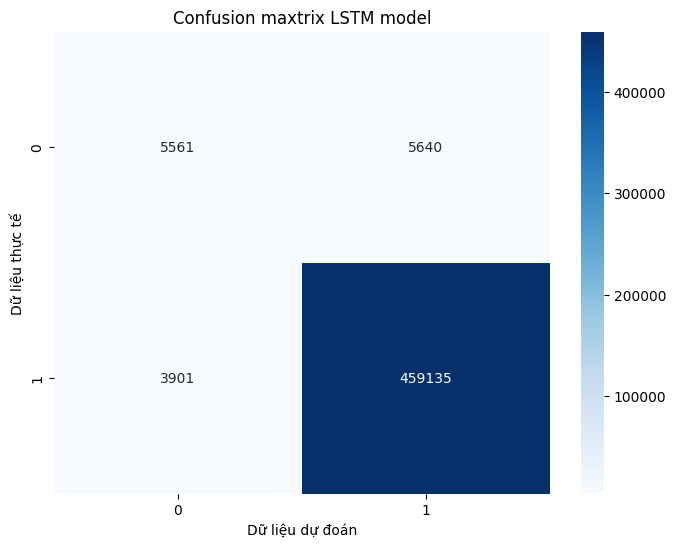

In [23]:
def validate_LSTM_model(file_paths = [], col_names = []):
    data = merge_data_from_multiple_file(file_paths=file_paths, col_names=col_names)
    # data = data.query('label == @CONST_ORDINARY_LABEL_NAME')
    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)

    X_test = data.iloc[:, 0:-1]
    Y_test = data.iloc[:, -1]

    X_test = X_test.values
    Y_test = Y_test.values

    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    model_path = CONST_NAME_MODEL
    lstm_model = tf.keras.models.load_model(model_path)
    loss, accuracy = lstm_model.evaluate(X_test, Y_test)
    print(loss, accuracy)


    log_confusion_maxtrix(lstm_model, X_test, Y_test, 'Confusion matrix of LSTM model')

    # Y_pred = lstm_model.predict(X_test)
    # Y_pred = np.round(Y_pred).flatten()

    # cm = confusion_matrix(Y_test, Y_pred)
    # plt.figure(figsize = (8, 6))
    # sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    # plt.title("Confusion maxtrix LSTM model")
    # plt.xlabel("Dữ liệu dự đoán")
    # plt.ylabel("Dữ liệu thực tế")
    # plt.show()

CONST_FILE_NAME_TEST = [
    'part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    # 'part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
]
CONST_FILE_PATH_TEST = [ CONST_DIC_PATH +  FILE_NAME for FILE_NAME in CONST_FILE_NAME_TEST]
print(CONST_FILE_PATH_TEST)
validate_LSTM_model(file_paths=CONST_FILE_PATH_TEST, col_names=CONST_FIELDS)

### Sử dụng thuật toán Random Forest để phân biệt 2 lớp

In [24]:
def make_dimen_of_data_for_rcf(data):
    new_data = data.copy()

    X_data, Y_data = new_data.iloc[:, 0: -1], data.iloc[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)

    return [X_train, X_test, Y_train, Y_test]

In [25]:
def training_processing_for_rfc():
    data = merge_data_from_multiple_file(file_paths=CONST_FILE_PATHS, col_names= CONST_FIELDS)

    data = make_unsam_ratio(data, 50 // 50)
    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)

    X_train, X_test, Y_train, Y_test = make_dimen_of_data_for_rcf(data)
    RandomForestClassifier_model(X_train, X_test, Y_train, Y_test)

training_processing_for_rfc()

[1 0 0 ... 0 0 1]


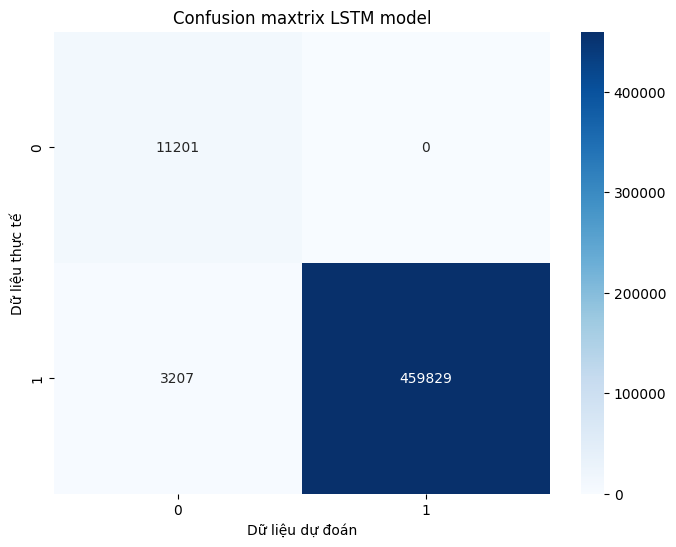

0.9932375584359718


In [26]:
def validate_RCF_model(file_paths = [], col_names = []):
    data = merge_data_from_multiple_file(file_paths=file_paths, col_names=col_names)
    # data = data.query('label == @CONST_ORDINARY_LABEL_NAME')
    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)

    X_test = data.iloc[:, 0: -1]
    Y_test = data.iloc[:, -1]

    model_path = 'random_forest.joblib'
    rfc_model = joblib.load(model_path)

    log_confusion_maxtrix(rfc_model, X_test, Y_test, 'Confusion matrix of RandomForest model')

    Y_pred = rfc_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(accuracy)

validate_RCF_model(file_paths=CONST_FILE_PATH_TEST, col_names=CONST_FIELDS)

nhìn vào confusion maxtrix:
- Sử dụng thuật toán RandomForest dễ dàng phân biệt 2 nhóm nhãn


### Sử dụng mô hình LSTM để nhận biết 7 lớp còn lại
Gồm có những class sau:
- BruceForce
- DDoS
- Dos
- Mirai
- Recon
- Spoffing
- Web

In [27]:
def make_data_of_attack_label(data):
    new_data = data.copy()
    filter_attack_data = new_data['label'] != CONST_ORDINARY_LABEL_NAME
    return new_data[filter_attack_data]

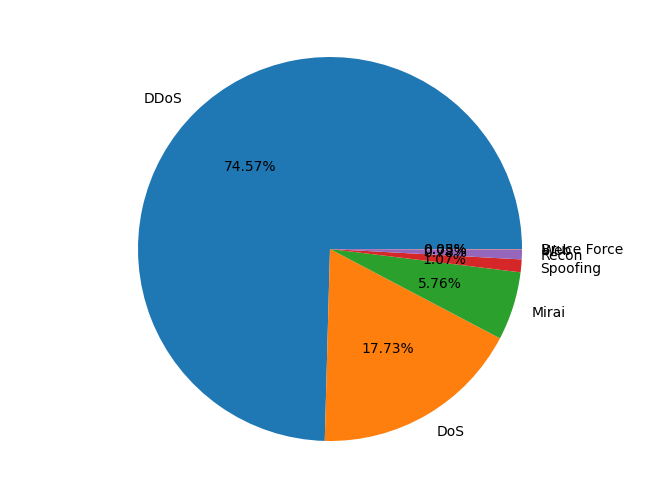

In [29]:
def split_seven_classes(data):
    data = data.copy()

    label_lens = []

    labels = [
        CONST_DDOS_LABEL,
        CONST_DOS_LABEL,
        CONST_MIRAI_LABEL,
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ]

    label_text = [
        'DDoS',
        'DoS',
        'Mirai',
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ]

    for label in labels:
        n_sam_label = data[data['label'].isin(label)]
        label_lens.append(len(n_sam_label))

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')

    ax.pie(label_lens, labels = label_text, autopct = '%1.2f%%')
    plt.show()
split_seven_classes(data)

        flow_duration  Header_Length  Protocol_Type  Duration          Rate  \
0            0.000000          54.00           6.00     64.00      0.329807   
1            0.000000          57.04           6.33     64.00      4.290556   
2            0.000000           0.00           1.00     64.00     33.396799   
3            0.328175       76175.00          17.00     64.00   4642.133010   
4            0.117320         101.73           6.11     65.91      6.202211   
...               ...            ...            ...       ...           ...   
227905       0.000000          54.00           6.00     64.00     48.738956   
227906       0.000000          54.00           6.00     64.00     19.220050   
227907       0.109663      126040.50          17.00     64.00    756.283226   
227908       0.037309       24399.50          16.84     64.39  18049.510038   
227909       0.000000          54.00           6.00     64.00      6.339867   

               Srate  Drate fin_flag_number syn_fla

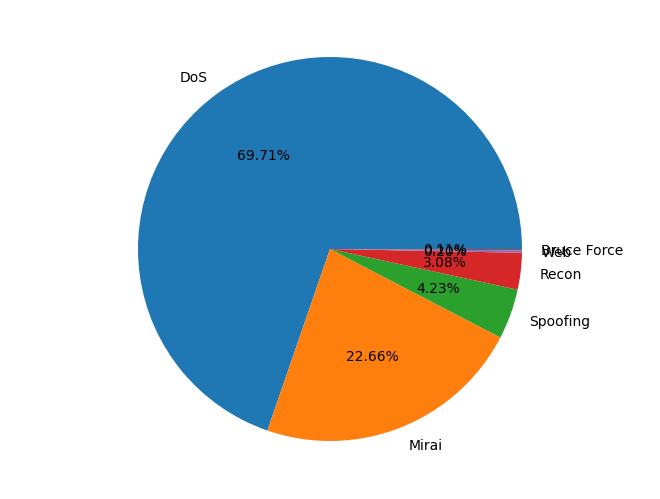

In [36]:
show_wheel_chart(
    data,
    group_labels = [
        CONST_DDOS_LABEL,
        CONST_DOS_LABEL,
        CONST_MIRAI_LABEL,
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ],
    label_text =  [
        'DDoS',
        'DoS',
        'Mirai',
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ])

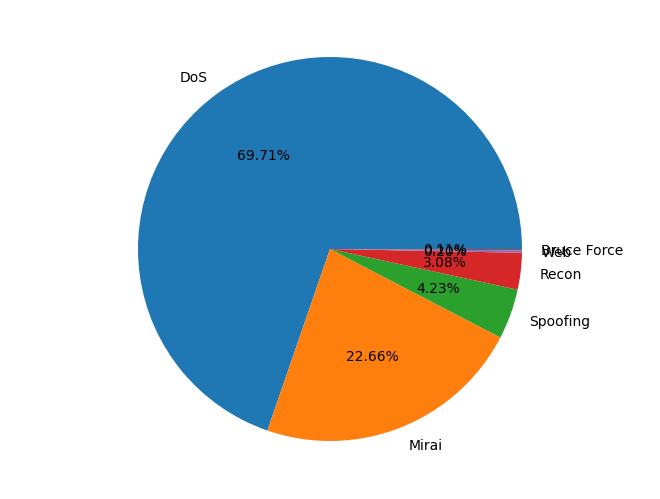

In [38]:
show_wheel_chart(
    data,
    group_labels = [
        CONST_DOS_LABEL,
        CONST_MIRAI_LABEL,
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ],
    label_text =  [
        'DoS',
        'Mirai',
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ])

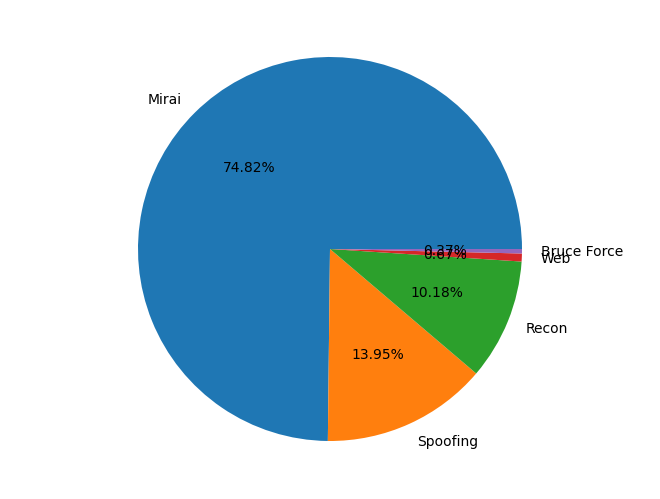

In [39]:
show_wheel_chart(
    data,
    group_labels = [
        CONST_MIRAI_LABEL,
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ],
    label_text =  [
        'Mirai',
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ])

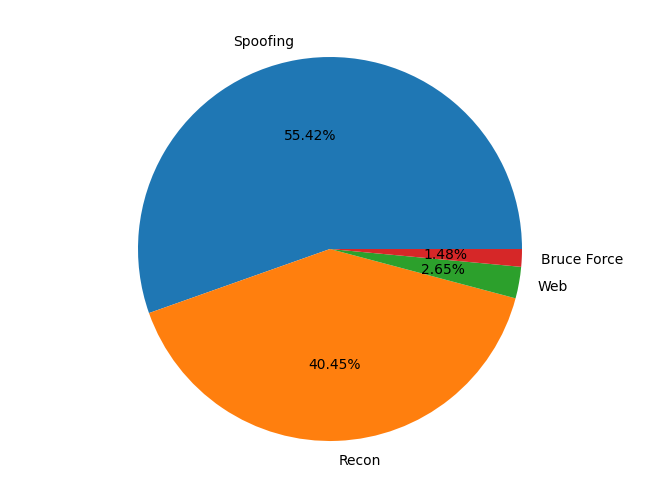

In [40]:
show_wheel_chart(
    data,
    group_labels = [
        CONST_SPOOFING_LABEL,
        CONST_RECON_LABEL,
        CONST_WEB_LABEL,
        CONST_BRUTE_FORCE_LABEL
    ],
    label_text =  [
        'Spoofing',
        'Recon',
        'Web',
        'Bruce Force'
    ])

In [ ]:
def split_group_label(data, group_labels = [], label_name = 'label'): 
    sub_data_labels = []

    for group_label in group_labels:
        sub_data_label = data[data[label_name].isin(group_label)]
        sub_data_labels.append(sub_data_label)

    
    return sub_data_labels